*DAIA - Week 6 exercise*

# Time Series visualization

Import the necessary packages. We work primarily with pandas, but we will use seborn for plotting where possible. As Seaborn and the pandas plotting facilities depend on matplotlib, we inport matplotlib's interactive plotting API (pyplot) as well. In addition we set Seaborn's appearance defaults as our Notebook defaults.

In your own notebook(s) this topic and these actions (most likely) are part of your __Data Understanding__ section.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme() # use seaborn default settings

Read the data. The csv is semicolon separated and we have to do some transformations on the date field which is in Dutch format as well.

After having read the csv file a couple of times, we know what we want to do upon initial reading:
1. set the separator value to ';' (instead of the default ','
2. set the decimal indicator to ',' (instead of the default '.')
3. skip first rows (how many?).
4. parse the second column (orderdate) as a date in dayfirst format

If you do not know how to set these parameters, check https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
Lastly, as you probably have noticed, there are several columns with categorical data. You can use the 'dtype' parameter and set it to a list with the correct types.


5. set all the nominal value columns to category type, using the dict below, containing key-value pairs for the specified columns: 



In [2]:
dtypes = {
#    "orderno":    "category",
#    "empno":      "category",
#    "name":       "category",
#    "custno":     "category",
#    "city":       "category",
#    "regioncode": "category",
#    "prodno":     "category",
#    "prodno":     "category",
#    "proddesc":   "category",
#    "catdesc":    "category",
#}


# Read the sales.csv dataset, using the parameters mentioned above. Don't forget to add you explanation in comments.
# pd.read_csv()...

# check if dtypes have been changed correctly
#df.info()

Check if the data has been read correctly. As the data is about sales transaction, can you figure out what the index (unique identifier) for a transaction is?

In [3]:
# see if Orderno (order number) is a unique identifier (obviously not, as several numbers have a count > 1.)


Calculate and show the total per order (so sum the linetotal for each order). Make sure you handle double order numbers correctly and check your results.

In [4]:
# Your code and comments below:



What is the trend in monthly order volume over the years? Show this in a plot.

In [5]:
# Your code and comments....
# Also explain the chosen axes and graph type.



Plotting all values of the entire dataset might hide some details... Can you show what happens with days without sales and days with multiple sales? hint: Zoom in on January 2017... Just show the results in a (short) table, looking at the values before visualizing.

In order to be able to use a lot of time-related functionality in Pandas, you should create an index based on the time component. You can use the DataFrame.set_index() function in Pandas (see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html?highlight=dataframe%20set_index#pandas.DataFrame.set_index).


This, for instance, allows you to slice (or filter) using the index. Make sure you also use the sort_index() function, as the index is not automatically sorted after re-assignin it.

Create a plot of the data from January 2017 (you can use: loc('2017-01') if you have set the index to the orderdate properly).

In [6]:
# You code and comments here... also explain what you see in your plot.



To correct the errors is the previous graph, you can use the resample() method. First you need to create a correct index, you can use this code:

fullIndex = pd.DatetimeIndex(pd.date_range('#fill in the range#'))

Then, this DatetimeIndex can  be assigned to the orders dataset, using resample(). Hint: use the fillna() function to assign a zero (0) value to dates that have no value in the orders dataset.

Finally, plot the order values in January 2017 again. Explain the differences.


In [7]:
# your code and comments to resample the data...


This is actually quite interesting: a lot of things happen at the same time. First, days are created in the date index for all days in the period of registration, even if there where no sales on some of those dates. Note that the period of registration stretches from 2017-01-01 to 2019-12-31. Next, order values on the same day are summed and days without sales get a total order value of 0. Finally, the resulting series is sliced for January 2017 only.

In [8]:
# your code and comments to visualize the resampled data

As it it difficult to see a trend in this data, sampling it down to a monthly level would be the smart thing to do. Use the resample function the plot the data on a monthly basis, using sum() to calculate sum of the order values in each month.

In [9]:
# your code and comments to visualize the resampled data at a monthly basis

If we want to know if there is any seasonality involved in order volume, we may want to compare the order volumes year by year. Below you see an example how to plot the order values per year and per month, using the groupby() function.

In [10]:
(orders
 .groupby([orders.orderdate.dt.year, orders.orderdate.dt.month])
 .ordval
 .sum()
 .unstack(level=0)
 .plot(figsize=(12, 5))
)

NameError: name 'orders' is not defined

Using Seaborn we can easily turn this into a multi-plot figure (see: https://seaborn.pydata.org/generated/seaborn.relplot.html).
We run however into some problems when we want to get the year and the month from the orderdate and subsequently group on it. Unfortunately, we can't do a mutating group by in pandas, so we first have to create year and month as separate columns. 

In [11]:
# Note: first assign variables to month and year, in order to use this on the axes of the relplot.
(orders
 .assign(year=orders.orderdate.dt.year, month=orders.orderdate.dt.month)
 .groupby(['year', 'month'], as_index=False)
 .ordval
 .sum()
 .pipe((sns.relplot, 'data'), kind='line', x='month', y='ordval', row='year', height=3, aspect=4)
)

NameError: name 'orders' is not defined

Lastly, we want to compare the monthly revenue for each product category by year. You can (re)use most of the previous plot, but now you have to add another variable to group by and add this to the grid to plot boththe montly values for each year and category.

You should get a result looking like this:
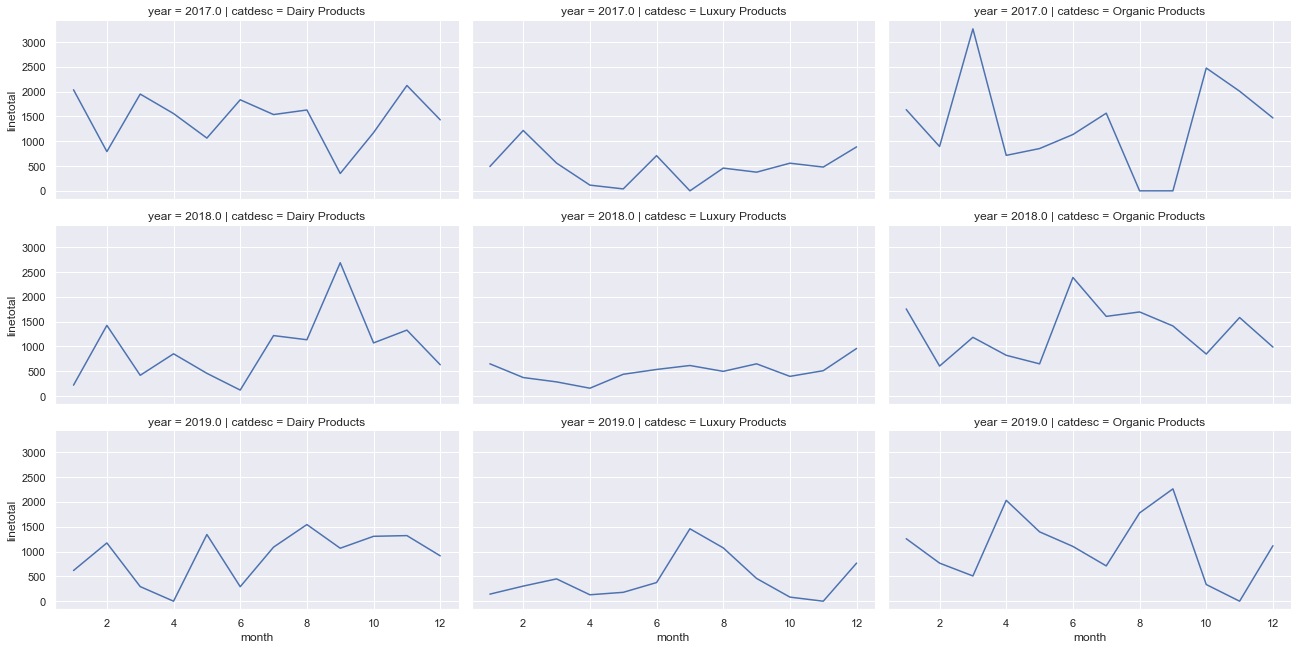

In [12]:
# your code and comments to visualize the data 